In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from catboost import cv, Pool
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.metrics import AUC
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
RS = 121212
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

C:\Users\User\anaconda3\envs\new\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\anaconda3\envs\new\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\User\anaconda3\envs\new\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Загрузка данных

In [2]:
df = pd.read_csv('train_dataset_Самолет.csv', low_memory=False, parse_dates=['report_date'])

In [3]:
df.head()

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164


plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes([int, float]).corr())
plt.show()

In [4]:
data = df.dropna(thresh=int(len(df)*0.95), axis=1).copy()
data.drop(columns=['col1454'], inplace=True)

In [5]:
data = data.fillna(data.mean())

C:\Users\User\AppData\Local\Temp\ipykernel_16616\476127175.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.mean())


In [6]:
data.head()

,report_date,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
0,2022-11-01,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,37.88,37.88,37.880,0.00,0.00,0.00,545.000000,0.256261
1,2022-11-01,5,0,1,0.0,0.0,0.0,0.0,0.0,6.0,...,1.0,1.0,38.75,3.34,21.045,0.00,0.00,0.00,242.000000,0.256261
2,2022-05-01,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,36.75,36.75,36.750,2.10,2.10,2.10,557.000000,0.256261
3,2022-09-01,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,35.56,35.56,35.560,1.40,1.40,1.40,332.556663,0.258682
4,2022-08-01,8,0,0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,2.0,54.52,54.52,54.520,2.28,2.28,2.28,256.000000,0.254164


In [7]:
data_f = data.copy()

plt.figure(figsize=(15, 10))
sns.heatmap(data.corr())
plt.show()

In [8]:
client_id = data['client_id']

In [9]:
data.drop(columns='client_id', inplace=True)

# Модели

## Создание baseline модели

In [10]:
features = data.drop(columns=['target', 'report_date'])

In [11]:
target = data['target']

In [12]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, stratify=target,
                                                                            random_state=RS)

In [13]:
features_train, target_train = SMOTE().fit_resample(features_train, target_train)

In [14]:
params = {
    'loss_function': 'Logloss',
    'iterations': 300,
    'custom_loss': ['AUC', 'F1'],
    'random_seed': RS,
    'learning_rate': 0.2
}

In [15]:
cv_data = cv(
    params=params,
    pool=Pool(features_train, label=target_train),
    fold_count=5, # Разбивка выборки на 5 кусочков
    shuffle=True, # Перемешаем наши данные
    partition_random_seed=RS,
    plot=True,
    stratified=True, 
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.03243315712
bestIteration = 299

Training on fold [1/5]

bestTest = 0.02937570425
bestIteration = 298

Training on fold [2/5]

bestTest = 0.03331570534
bestIteration = 299

Training on fold [3/5]

bestTest = 0.02453952011
bestIteration = 297

Training on fold [4/5]

bestTest = 0.03076116903
bestIteration = 279



In [16]:
cv_data

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std,test-F1-mean,test-F1-std,train-F1-mean,train-F1-std
0,0,0.533929,0.003040,0.532393,0.003798,0.893667,0.003762,0.815636,0.010702,0.817295,0.008774
1,1,0.456180,0.002954,0.454160,0.002026,0.927275,0.004200,0.835050,0.005855,0.836152,0.004828
2,2,0.406237,0.002699,0.403807,0.001359,0.935923,0.003785,0.850419,0.005923,0.853933,0.001699
3,3,0.372873,0.005479,0.370015,0.007376,0.944489,0.002908,0.860892,0.004765,0.862451,0.002233
4,4,0.346039,0.005976,0.342154,0.007107,0.951057,0.003735,0.870359,0.009921,0.873188,0.006736
...,...,...,...,...,...,...,...,...,...,...,...
295,295,0.030180,0.003512,0.011575,0.000659,0.999202,0.000173,0.992354,0.001389,0.999465,0.000172
296,296,0.030184,0.003501,0.011563,0.000660,0.999202,0.000173,0.992354,0.001389,0.999465,0.000172
297,297,0.030127,0.003475,0.011519,0.000651,0.999201,0.000169,0.992354,0.001389,0.999478,0.000193
298,298,0.030122,0.003480,0.011488,0.000654,0.999200,0.000170,0.992303,0.001394,0.999465,0.000172


In [17]:
baseline_auc_valid = cv_data['test-AUC-mean'].tail(1)

In [18]:
baseline_f1_valid = cv_data['test-F1-mean'].tail(1)

In [19]:
baseline_auc_valid

299    0.999201
Name: test-AUC-mean, dtype: float64

In [20]:
baseline_f1_valid

299    0.992252
Name: test-F1-mean, dtype: float64

### Валидация модели

In [21]:
model = CatBoostClassifier(loss_function='Logloss',
    iterations=300,
    custom_loss=['AUC', 'F1'],
    random_seed= RS,
    learning_rate= 0.2,
    verbose=False)

In [22]:
model.fit(features_train, target_train)

In [23]:
pred = model.predict(features_test)

In [24]:
baseline_auc_test = roc_auc_score(target_test, pred)

In [25]:
baseline_auc_test

0.7484609409313485

In [26]:
baseline_f1_test = f1_score(target_test, pred)

In [27]:
baseline_f1_test

0.5840707964601769

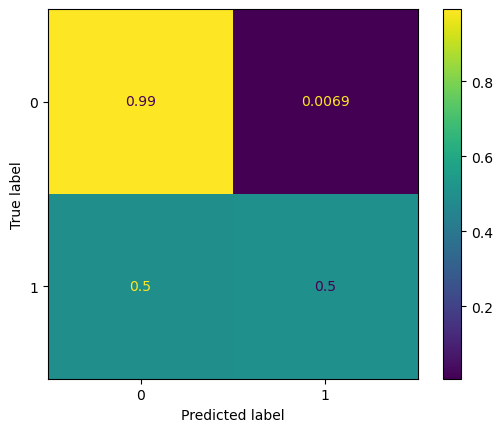

In [28]:
cm = confusion_matrix(target_test, pred, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [29]:

# Get predicted probabilities for each class
preds_proba = model.predict_proba(features_test)
# Get predicted RawFormulaVal


In [30]:
preds_proba

array([[9.91489911e-01, 8.51008890e-03],
       [9.99957179e-01, 4.28210790e-05],
       [9.99392335e-01, 6.07664810e-04],
       ...,
       [9.99889511e-01, 1.10489489e-04],
       [9.99732907e-01, 2.67093178e-04],
       [9.60291863e-01, 3.97081365e-02]])

In [31]:
df = pd.DataFrame(preds_proba)

In [32]:
(df[1] > 0.5).sum()

95

In [33]:
preds = model.predict(features_test)

In [34]:
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

test['score'] = model.predict_proba(test[model_cols])
sample_submission = test.loc[:, ['report_date', 'client_id', 'score']]

## Модель, обученная на клиентах, которые имеют таргет 0 и 1

In [35]:
train, test = train_test_split(data_f.drop(columns='report_date'), test_size=0.3, random_state=RS, stratify=data['target'])

In [36]:
one_id = train.query('target == 1')['client_id']

In [37]:
clients_changed = train.query('client_id in @one_id')

In [38]:
clients_changed.head()

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
4158,3743,1,0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,...,4.0,4.0,92.55,92.55,92.55,5.30,5.30,5.30,2.0,0.256061
8666,6612,1,0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,...,2.0,2.0,56.99,56.99,56.99,2.06,2.06,2.06,18.0,0.256061
10839,4814,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,63.40,63.40,63.40,2.25,2.25,2.25,548.0,0.259377
3043,3547,0,0,0.0,0.0,2.0,3.0,3.0,3.0,0.0,...,1.0,1.0,35.56,35.56,35.56,1.40,1.40,1.40,58.0,0.260907
9480,2476,0,0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,...,3.0,3.0,77.29,77.29,77.29,2.93,2.93,2.93,122.0,0.258966


In [39]:
features_train = clients_changed.drop(columns=['target', 'client_id'])

In [40]:
target_train = clients_changed['target']

In [41]:
features_train, target_train = SMOTE().fit_resample(features_train, target_train)

In [42]:
params = {
    'loss_function': 'Logloss',
    'iterations': 300,
    'custom_loss': ['AUC', 'F1'],
    'random_seed': RS,
    'learning_rate': 0.2
}

In [43]:
cv_data = cv(
    params=params,
    pool=Pool(features_train, label=target_train),
    fold_count=5, # Разбивка выборки на 5 кусочков
    shuffle=True, # Перемешаем наши данные
    partition_random_seed=RS,
    plot=True,
    stratified=True, 
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.3509330006
bestIteration = 88

Training on fold [1/5]

bestTest = 0.3021826011
bestIteration = 124

Training on fold [2/5]

bestTest = 0.3834888943
bestIteration = 40

Training on fold [3/5]

bestTest = 0.373247063
bestIteration = 88

Training on fold [4/5]

bestTest = 0.3164678632
bestIteration = 79



In [44]:
cv_data

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std,test-F1-mean,test-F1-std,train-F1-mean,train-F1-std
0,0,0.651870,0.005156,0.633269,0.006733,0.715184,0.044672,0.640424,0.063668,0.715374,0.037508
1,1,0.610001,0.014400,0.576906,0.010386,0.779495,0.027596,0.713307,0.032840,0.786187,0.021446
2,2,0.587043,0.016565,0.546336,0.012976,0.806719,0.035304,0.741077,0.041468,0.813366,0.016397
3,3,0.565397,0.013332,0.509222,0.013715,0.819081,0.025004,0.742734,0.041625,0.837339,0.015797
4,4,0.553422,0.011697,0.481376,0.017030,0.827573,0.021580,0.741384,0.037684,0.846312,0.020766
...,...,...,...,...,...,...,...,...,...,...,...
295,295,0.402936,0.046503,0.012104,0.001938,0.930798,0.009772,0.861744,0.018347,0.996720,0.001120
296,296,0.403585,0.046610,0.012060,0.001961,0.930583,0.009769,0.859774,0.020649,0.996716,0.001123
297,297,0.403619,0.046470,0.012036,0.001977,0.930583,0.009792,0.859811,0.020299,0.996720,0.001120
298,298,0.404126,0.046934,0.011993,0.001988,0.930744,0.009488,0.859811,0.020299,0.996720,0.001120


In [45]:
changed_auc_valid = cv_data['test-AUC-mean'].tail(1)

In [46]:
changed_f1_valid = cv_data['test-F1-mean'].tail(1)

In [47]:
changed_auc_valid

299    0.930422
Name: test-AUC-mean, dtype: float64

In [48]:
changed_f1_valid

299    0.859811
Name: test-F1-mean, dtype: float64

### Валидация модели

In [49]:
model = CatBoostClassifier(loss_function='Logloss',
    iterations=300,
    custom_loss=['AUC', 'F1'],
    random_seed= RS,
    learning_rate= 0.2,
    verbose=False)

In [50]:
model.fit(features_train, target_train)

In [51]:
features_test = test.drop(columns=['target', 'client_id'])

In [52]:
target_test = test['target']

In [53]:
pred = model.predict(features_test)

In [54]:
changed_auc_test = roc_auc_score(target_test, pred)

In [55]:
changed_auc_test

0.5004419350037932

In [56]:
changed_f1_test = f1_score(target_test, pred)

In [57]:
changed_f1_test

0.058519793459552494

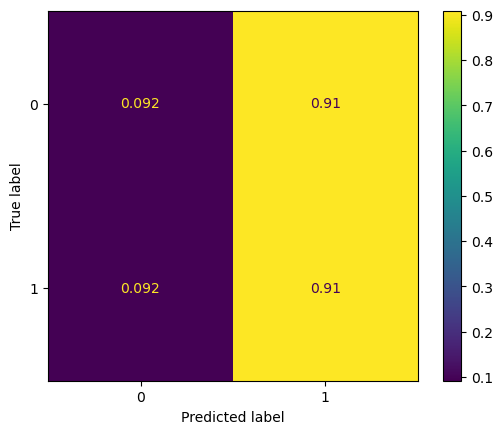

In [58]:
cm = confusion_matrix(target_test, pred, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

Делаем вывод о том, что модель не обучается на таких данных

## Модель, обученная на измененных данных - добавили наблюдения с таргетом 1 для получения трех единиц по уникальному пользователю, совершившему покупку

In [59]:
train, test = train_test_split(data_f.drop(columns='report_date'), test_size=0.3, random_state=RS, stratify=data['target'])

In [60]:
clients = train.query('target == 1').groupby('client_id').agg('count').reset_index()

In [61]:
add_two = clients.query('target == 1')['client_id']

In [62]:
add_two

1       210
2       264
6       354
7       415
11      474
       ... 
157    7262
158    7331
160    7652
162    8041
163    8067
Name: client_id, Length: 63, dtype: int64

In [63]:
add_one = clients.query('target == 2')['client_id']

In [64]:
add_two_values = train.query('client_id in @add_two & target==1').groupby('client_id').agg('mean').reset_index()

In [65]:
add_one_values = train.query('client_id in @add_one & target==1')

In [66]:
data_added = pd.concat([train, add_two_values, add_two_values, add_one_values], axis=0)

In [67]:
data_added

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
12103,1948,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,...,1.0,1.0,33.65,33.65,33.65,1.13,1.13,1.130,162.000000,0.257549
6774,4756,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,...,2.0,2.0,59.49,59.49,59.49,1.83,1.83,1.830,109.000000,0.258306
12287,3605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,79.58,79.58,79.58,3.98,3.98,3.980,390.000000,0.257348
8531,1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,1.0,1.0,32.02,20.48,26.25,2.02,1.17,1.595,297.000000,0.256261
6719,2574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,1.0,37.07,37.07,37.07,2.28,2.28,2.280,335.000000,0.256261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12469,7744,1.0,0.0,2.0,4.0,4.0,4.0,4.0,4.0,0.0,...,2.0,2.0,33.10,32.90,33.05,0.00,0.00,0.000,5.000000,0.322993
9820,3849,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,1.0,1.0,37.30,3.20,20.25,0.00,0.00,0.000,307.000000,0.287503
9121,2037,1.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,...,4.0,4.0,92.55,92.55,92.55,5.30,5.30,5.300,61.000000,0.258306
10641,6805,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,35.66,35.66,35.66,0.00,0.00,0.000,332.556663,0.256261


In [68]:
features_train = data_added.drop(columns=['target', 'client_id'])

In [69]:
target_train = data_added['target']

In [70]:
features_train, target_train = SMOTE().fit_resample(features_train, target_train)

In [71]:
params = {
    'loss_function': 'Logloss',
    'iterations': 300,
    'custom_loss': ['AUC', 'F1'],
    'random_seed': RS,
    'learning_rate': 0.2
}

In [72]:
cv_data = cv(
    params=params,
    pool=Pool(features_train, label=target_train),
    fold_count=5, # Разбивка выборки на 5 кусочков
    shuffle=True, # Перемешаем наши данные
    partition_random_seed=RS,
    plot=True,
    stratified=True, 
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.02525983522
bestIteration = 299

Training on fold [1/5]

bestTest = 0.02823675
bestIteration = 299

Training on fold [2/5]

bestTest = 0.02439409576
bestIteration = 299

Training on fold [3/5]

bestTest = 0.02442503299
bestIteration = 299

Training on fold [4/5]

bestTest = 0.02979918246
bestIteration = 299



In [73]:
cv_data

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std,test-F1-mean,test-F1-std,train-F1-mean,train-F1-std
0,0,0.591691,0.010127,0.590394,0.010139,0.852126,0.007281,0.784834,0.011187,0.788300,0.008012
1,1,0.521283,0.012171,0.518267,0.010122,0.881445,0.006283,0.801772,0.013787,0.805546,0.010509
2,2,0.479822,0.011881,0.475419,0.009697,0.896997,0.006560,0.807725,0.013559,0.814672,0.009130
3,3,0.448414,0.008707,0.443342,0.004836,0.910401,0.006337,0.823697,0.014072,0.829824,0.009090
4,4,0.425404,0.006570,0.419283,0.002910,0.919547,0.003471,0.830111,0.016093,0.837164,0.010038
...,...,...,...,...,...,...,...,...,...,...,...
295,295,0.026748,0.002444,0.011013,0.000433,0.999422,0.000301,0.993922,0.001024,0.999567,0.000198
296,296,0.026656,0.002482,0.010962,0.000434,0.999429,0.000300,0.994022,0.001122,0.999580,0.000204
297,297,0.026560,0.002432,0.010882,0.000450,0.999438,0.000298,0.993972,0.001031,0.999593,0.000178
298,298,0.026505,0.002414,0.010819,0.000443,0.999444,0.000295,0.994073,0.001094,0.999593,0.000178


In [74]:
added_auc_valid = cv_data['test-AUC-mean'].tail(1)

In [75]:
added_f1_valid = cv_data['test-F1-mean'].tail(1)

In [76]:
added_auc_valid

299    0.999448
Name: test-AUC-mean, dtype: float64

In [77]:
added_f1_valid

299    0.994073
Name: test-F1-mean, dtype: float64

### Валидация модели

In [78]:
model = CatBoostClassifier(loss_function='Logloss',
    iterations=300,
    custom_loss=['AUC', 'F1'],
    random_seed= RS,
    learning_rate= 0.2,
    verbose=False)

In [79]:
model.fit(features_train, target_train)

In [80]:
features_test = test.drop(columns=['target', 'client_id'])

In [81]:
target_test = test['target']

In [82]:
pred = model.predict(features_test)

In [83]:
added_auc_test = roc_auc_score(target_test, pred)

In [84]:
added_auc_test

0.8559382634041518

In [85]:
added_f1_test = f1_score(target_test, pred)

In [86]:
added_f1_test

0.673758865248227

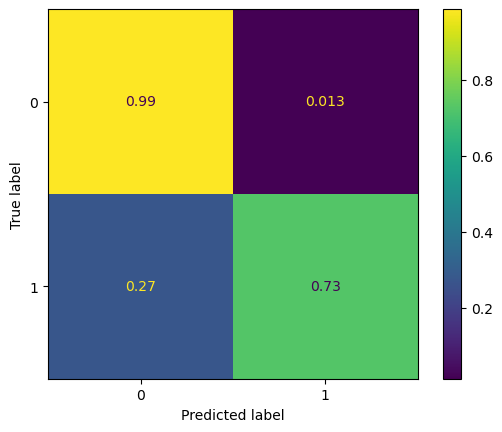

In [87]:
cm = confusion_matrix(target_test, pred, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

## Модель, обученная на измененных данных - заполнили единицами таргет у всех уникальных пользователей, у кого встречается хотя бы одна единица в таргете

In [88]:
train, test = train_test_split(data_f.drop(columns='report_date'), test_size=0.3, random_state=RS, stratify=data_f['target'])

In [89]:
train.query('target == 1')

,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,col2173,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
4158,3743,1,0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,...,4.0,4.0,92.55,92.55,92.550000,5.30,5.30,5.30,2.000000,0.256061
8666,6612,1,0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,...,2.0,2.0,56.99,56.99,56.990000,2.06,2.06,2.06,18.000000,0.256061
10839,4814,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,63.40,63.40,63.400000,2.25,2.25,2.25,548.000000,0.259377
11321,3189,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,71.12,71.12,71.120000,2.88,2.88,2.88,370.000000,0.260262
14224,6360,1,0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,...,3.0,3.0,77.30,77.30,77.300000,4.10,4.10,4.10,95.000000,0.256261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11374,958,1,0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,...,1.0,1.0,29.89,29.89,29.890000,3.96,3.96,3.96,148.000000,0.263759
2376,473,1,0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,...,3.0,3.0,76.43,76.43,76.430000,0.00,0.00,0.00,178.000000,0.256261
10641,6805,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,35.66,35.66,35.660000,0.00,0.00,0.00,332.556663,0.256261
8783,1624,1,0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,...,2.0,2.0,47.85,47.06,47.323333,1.54,1.54,1.54,152.000000,0.252566


In [90]:
one_id = train.query('target == 1')['client_id']

In [91]:
one_id

4158     3743
8666     6612
10839    4814
11321    3189
14224    6360
         ... 
11374     958
2376      473
10641    6805
8783     1624
7137     3537
Name: client_id, Length: 305, dtype: int64

In [92]:
criteria = 'client_id in @one_id'

In [93]:
train.loc[train.eval(criteria), 'target'] = 1

In [94]:
train.query('client_id in @one_id').loc[:, 'target']

4158     1
8666     1
10839    1
3043     1
9480     1
        ..
11374    1
2376     1
10641    1
8783     1
7137     1
Name: target, Length: 410, dtype: int64

In [95]:
features_train = train.drop(columns=['target', 'client_id'])

In [96]:
target_train = train['target']

In [97]:
features_train, target_train = SMOTE().fit_resample(features_train, target_train)

In [98]:
params = {
    'loss_function': 'Logloss',
    'iterations': 300,
    'custom_loss': ['AUC', 'F1'],
    'random_seed': RS,
    'learning_rate': 0.2
}

In [99]:
cv_data = cv(
    params=params,
    pool=Pool(features_train, label=target_train),
    fold_count=5, # Разбивка выборки на 5 кусочков
    shuffle=True, # Перемешаем наши данные
    partition_random_seed=RS,
    plot=True,
    stratified=True, 
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.02814250836
bestIteration = 296

Training on fold [1/5]

bestTest = 0.0265734885
bestIteration = 299

Training on fold [2/5]

bestTest = 0.02507861047
bestIteration = 296

Training on fold [3/5]

bestTest = 0.01909399632
bestIteration = 297

Training on fold [4/5]

bestTest = 0.02366618103
bestIteration = 299



In [100]:
cv_data

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std,test-F1-mean,test-F1-std,train-F1-mean,train-F1-std
0,0,0.554797,0.005133,0.554954,0.003774,0.882475,0.007538,0.801606,0.006790,0.802480,0.004561
1,1,0.480834,0.012754,0.479741,0.013964,0.911057,0.007709,0.827870,0.002793,0.829096,0.004305
2,2,0.436539,0.008789,0.434657,0.011012,0.925391,0.006147,0.846023,0.008031,0.848258,0.008078
3,3,0.402826,0.011160,0.400225,0.008811,0.934523,0.006947,0.853107,0.008031,0.857011,0.005711
4,4,0.379074,0.010526,0.376228,0.007809,0.941879,0.006282,0.865860,0.008021,0.868837,0.007021
...,...,...,...,...,...,...,...,...,...,...,...
295,295,0.024660,0.003441,0.009135,0.000514,0.999440,0.000199,0.994383,0.002103,0.999833,0.000073
296,296,0.024581,0.003417,0.009061,0.000495,0.999441,0.000195,0.994280,0.001922,0.999820,0.000084
297,297,0.024541,0.003465,0.009015,0.000458,0.999440,0.000195,0.994332,0.001829,0.999820,0.000084
298,298,0.024539,0.003451,0.009000,0.000440,0.999440,0.000195,0.994332,0.001847,0.999820,0.000084


In [101]:
filled_auc_valid = cv_data['test-AUC-mean'].tail(1)

In [102]:
filled_f1_valid = cv_data['test-F1-mean'].tail(1)

In [103]:
filled_auc_valid

299    0.999438
Name: test-AUC-mean, dtype: float64

In [104]:
filled_f1_valid

299    0.99428
Name: test-F1-mean, dtype: float64

### Валидация модели

In [105]:
model = CatBoostClassifier(loss_function='Logloss',
    iterations=300,
    custom_loss=['AUC', 'F1'],
    random_seed= RS,
    learning_rate= 0.2,
    verbose=False)

In [106]:
model.fit(features_train, target_train)

In [107]:
features_test = test.drop(columns=['target', 'client_id'])

In [108]:
target_test = test['target']

In [109]:
pred = model.predict(features_test)

In [110]:
filled_auc_test = roc_auc_score(target_test, pred)

In [111]:
filled_auc_test

0.8258794234336262

In [112]:
filled_f1_test = f1_score(target_test, pred)

In [113]:
filled_f1_test

0.6444444444444444

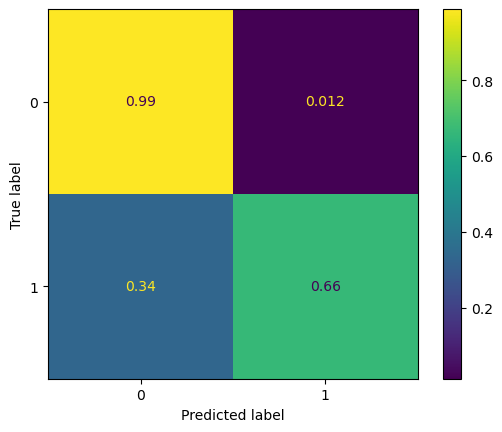

In [114]:
cm = confusion_matrix(target_test, pred, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

## Бейслайн модель, обученная на данных с новыми фичами

In [115]:
train, test = train_test_split(data_f, test_size=0.3, random_state=RS, stratify=data['target'])

In [116]:
def date_maker(row):
    if row['report_date'].year == 2021:
        return row['report_date'].month
    elif row['report_date'].year == 2022:
        return row['report_date'].month + 12
    elif row['report_date'].year == 2023:
        return row['report_date'].month + 24

In [117]:
train['month'] = train.apply(date_maker, axis=1)

In [118]:
test['month'] = test.apply(date_maker, axis=1)

In [119]:
train = train.merge(train.groupby('client_id')['month'].agg('min').reset_index(), \
                    how='left', on='client_id', suffixes=('', '_min'))

In [120]:
test = test.merge(test.groupby('client_id')['month'].agg('min').reset_index(), \
                    how='left', on='client_id', suffixes=('', '_min'))

In [121]:
train['month_from_first'] = train['month'] - train['month_min'] + 1

In [122]:
test['month_from_first'] = test['month'] - test['month_min'] + 1

In [123]:
train = train.drop(columns=['month', 'month_min'])

In [124]:
test = test.drop(columns=['month', 'month_min'])

In [125]:
train.head()

,report_date,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,...,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663,month_from_first
0,2022-07-01,1948,0,0,0.0,0.0,0.0,0.0,2.0,3.0,...,1.0,33.65,33.65,33.65,1.13,1.13,1.130,162.0,0.257549,3
1,2022-11-01,4756,0,1,0.0,0.0,0.0,0.0,3.0,3.0,...,2.0,59.49,59.49,59.49,1.83,1.83,1.830,109.0,0.258306,3
2,2023-01-01,3605,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,79.58,79.58,79.58,3.98,3.98,3.980,390.0,0.257348,12
3,2022-05-01,1680,0,0,0.0,0.0,0.0,0.0,0.0,4.0,...,1.0,32.02,20.48,26.25,2.02,1.17,1.595,297.0,0.256261,4
4,2022-09-01,2574,0,0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,37.07,37.07,37.07,2.28,2.28,2.280,335.0,0.256261,11


In [126]:
features_train = train.drop(columns=['report_date', 'client_id', 'target'])

In [127]:
target_train = train['target']

In [128]:
features_train, target_train = SMOTE().fit_resample(features_train, target_train)

In [129]:
features_test = test.drop(columns=['report_date', 'client_id', 'target'])

In [130]:
target_test = test['target']

In [131]:
params = {
    'loss_function': 'Logloss',
    'iterations': 300,
    'custom_loss': ['AUC', 'F1'],
    'random_seed': RS,
    'learning_rate': 0.2
}

In [132]:
cv_data = cv(
    params=params,
    pool=Pool(features_train, label=target_train),
    fold_count=5, # Разбивка выборки на 5 кусочков
    shuffle=True, # Перемешаем наши данные
    partition_random_seed=RS,
    plot=True,
    stratified=True, 
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.02843012338
bestIteration = 299

Training on fold [1/5]

bestTest = 0.02862447168
bestIteration = 295

Training on fold [2/5]

bestTest = 0.03000596842
bestIteration = 294

Training on fold [3/5]

bestTest = 0.02560975772
bestIteration = 299

Training on fold [4/5]

bestTest = 0.03041260361
bestIteration = 298



In [133]:
cv_data

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std,test-F1-mean,test-F1-std,train-F1-mean,train-F1-std
0,0,0.572087,0.002278,0.571361,0.001017,0.881934,0.004130,0.800264,0.004578,0.802821,0.002241
1,1,0.484198,0.009323,0.481892,0.008251,0.906570,0.004453,0.819833,0.006515,0.824194,0.008055
2,2,0.421219,0.007294,0.419621,0.004771,0.926767,0.007464,0.835222,0.011359,0.838374,0.010353
3,3,0.377035,0.004782,0.376399,0.004140,0.942218,0.001712,0.857751,0.005912,0.858078,0.006110
4,4,0.347390,0.008350,0.346179,0.008886,0.950253,0.002317,0.869142,0.005194,0.869839,0.006276
...,...,...,...,...,...,...,...,...,...,...,...
295,295,0.028709,0.001832,0.010864,0.000508,0.999242,0.000095,0.992811,0.001689,0.999669,0.000053
296,296,0.028696,0.001884,0.010845,0.000525,0.999243,0.000094,0.992761,0.001602,0.999682,0.000045
297,297,0.028663,0.001853,0.010813,0.000554,0.999240,0.000097,0.992710,0.001671,0.999682,0.000045
298,298,0.028648,0.001836,0.010745,0.000616,0.999240,0.000098,0.992811,0.001610,0.999682,0.000045


In [134]:
feature_month_auc_valid = cv_data['test-AUC-mean'].tail(1)

In [135]:
feature_month_f1_valid = cv_data['test-F1-mean'].tail(1)

In [136]:
feature_month_auc_valid

299    0.999238
Name: test-AUC-mean, dtype: float64

In [137]:
feature_month_f1_valid

299    0.992811
Name: test-F1-mean, dtype: float64

### Валидация модели

In [138]:
model = CatBoostClassifier(loss_function='Logloss',
    iterations=300,
    custom_loss=['AUC', 'F1'],
    random_seed= RS,
    learning_rate= 0.2,
    verbose=False)

In [139]:
model.fit(features_train, target_train)

In [140]:
pred = model.predict(features_test)

In [141]:
feature_month_auc_test = roc_auc_score(target_test, pred)

In [142]:
feature_month_auc_test

0.6904957657726329

In [143]:
feature_month_f1_test = f1_score(target_test, pred)

In [144]:
feature_month_f1_test

0.4700460829493088

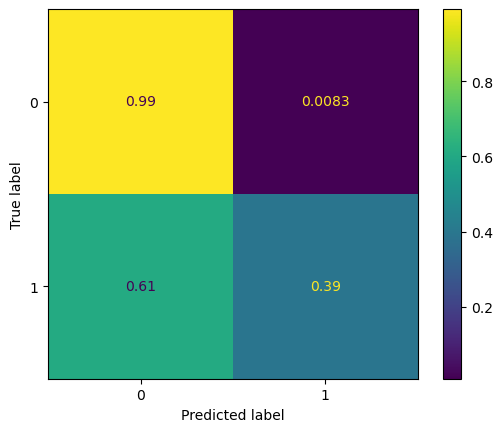

In [145]:
cm = confusion_matrix(target_test, pred, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

## Бейслайн модель с новыми фичами (месяц года)

In [146]:
data_f

,report_date,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
0,2022-11-01,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,37.88,37.88,37.880,0.00,0.00,0.000,545.000000,0.256261
1,2022-11-01,5,0,1,0.0,0.0,0.0,0.0,0.0,6.0,...,1.0,1.0,38.75,3.34,21.045,0.00,0.00,0.000,242.000000,0.256261
2,2022-05-01,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,36.75,36.75,36.750,2.10,2.10,2.100,557.000000,0.256261
3,2022-09-01,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,35.56,35.56,35.560,1.40,1.40,1.400,332.556663,0.258682
4,2022-08-01,8,0,0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,2.0,54.52,54.52,54.520,2.28,2.28,2.280,256.000000,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,56.48,56.48,56.480,1.41,1.41,1.410,332.556663,0.276902
14452,2022-09-01,1969,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,64.40,64.40,64.400,0.00,0.00,0.000,745.000000,0.260516
14453,2022-02-01,7116,1,0,0.0,0.0,6.0,6.0,6.0,6.0,...,2.0,2.5,57.27,55.68,56.475,2.25,0.00,1.125,45.000000,0.260005
14454,2021-08-01,7117,0,0,0.0,0.0,0.0,0.0,2.0,3.0,...,1.0,1.0,34.95,34.95,34.950,0.00,0.00,0.000,179.000000,0.256261


In [147]:
train, test = train_test_split(data_f, test_size=0.3, random_state=RS, stratify=data['target'])

In [148]:
def month_maker(row):
        return row['report_date'].month

In [149]:
train['month'] = train.apply(month_maker, axis=1)

In [150]:
test['month'] = test.apply(month_maker, axis=1)

In [151]:
train.head()

,report_date,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,...,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663,month
12103,2022-07-01,1948,0,0,0.0,0.0,0.0,0.0,2.0,3.0,...,1.0,33.65,33.65,33.65,1.13,1.13,1.130,162.0,0.257549,7
6774,2022-11-01,4756,0,1,0.0,0.0,0.0,0.0,3.0,3.0,...,2.0,59.49,59.49,59.49,1.83,1.83,1.830,109.0,0.258306,11
12287,2023-01-01,3605,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,79.58,79.58,79.58,3.98,3.98,3.980,390.0,0.257348,1
8531,2022-05-01,1680,0,0,0.0,0.0,0.0,0.0,0.0,4.0,...,1.0,32.02,20.48,26.25,2.02,1.17,1.595,297.0,0.256261,5
6719,2022-09-01,2574,0,0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,37.07,37.07,37.07,2.28,2.28,2.280,335.0,0.256261,9


In [152]:
train = pd.get_dummies(train, columns=['month'], drop_first=False, dtype='int')

In [153]:
train.head()

,report_date,client_id,target,col1453,col2167,col2168,col2169,col2170,col2171,col2172,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
12103,2022-07-01,1948,0,0,0.0,0.0,0.0,0.0,2.0,3.0,...,0,0,0,0,1,0,0,0,0,0
6774,2022-11-01,4756,0,1,0.0,0.0,0.0,0.0,3.0,3.0,...,0,0,0,0,0,0,0,0,1,0
12287,2023-01-01,3605,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8531,2022-05-01,1680,0,0,0.0,0.0,0.0,0.0,0.0,4.0,...,0,0,1,0,0,0,0,0,0,0
6719,2022-09-01,2574,0,0,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,0,1,0,0,0


In [154]:
test = pd.get_dummies(test, columns=['month'], drop_first=False, dtype='int')

In [155]:
features_train = train.drop(columns=['report_date', 'client_id', 'target'])

In [156]:
target_train = train['target']

In [157]:
features_train, target_train = SMOTE().fit_resample(features_train, target_train)

In [158]:
features_test = test.drop(columns=['report_date', 'client_id', 'target'])

In [159]:
target_test = test['target']

In [160]:
params = {
    'loss_function': 'Logloss',
    'iterations': 300,
    'custom_loss': ['AUC', 'F1'],
    'random_seed': RS,
    'learning_rate': 0.2
}

In [161]:
cv_data = cv(
    params=params,
    pool=Pool(features_train, label=target_train),
    fold_count=5, # Разбивка выборки на 5 кусочков
    shuffle=True, # Перемешаем наши данные
    partition_random_seed=RS,
    plot=True,
    stratified=True, 
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.04064994789
bestIteration = 299

Training on fold [1/5]

bestTest = 0.03816402566
bestIteration = 297

Training on fold [2/5]

bestTest = 0.04589530996
bestIteration = 295

Training on fold [3/5]

bestTest = 0.03736294957
bestIteration = 299

Training on fold [4/5]

bestTest = 0.04816208974
bestIteration = 299



In [162]:
cv_data

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std,test-F1-mean,test-F1-std,train-F1-mean,train-F1-std
0,0,0.549820,0.009947,0.549447,0.010189,0.893891,0.002646,0.804469,0.005814,0.807374,0.003766
1,1,0.468028,0.007938,0.466784,0.009639,0.912239,0.004854,0.825127,0.007258,0.825901,0.002206
2,2,0.417629,0.007514,0.415523,0.009096,0.931686,0.004184,0.840595,0.007139,0.843534,0.007817
3,3,0.380889,0.006560,0.378114,0.005971,0.943540,0.004021,0.851543,0.007256,0.856090,0.004263
4,4,0.350206,0.005915,0.347561,0.008532,0.955349,0.003107,0.873955,0.009562,0.875879,0.008424
...,...,...,...,...,...,...,...,...,...,...,...
295,295,0.042231,0.004742,0.010591,0.000433,0.998346,0.000298,0.985693,0.001646,0.999452,0.000147
296,296,0.042188,0.004821,0.010528,0.000413,0.998351,0.000308,0.985485,0.001614,0.999465,0.000166
297,297,0.042124,0.004773,0.010445,0.000411,0.998360,0.000302,0.985537,0.001693,0.999503,0.000145
298,298,0.042121,0.004777,0.010416,0.000409,0.998364,0.000308,0.985588,0.001566,0.999516,0.000140


In [163]:
feature_season_auc_valid = cv_data['test-AUC-mean'].tail(1)

In [164]:
feature_season_f1_valid = cv_data['test-F1-mean'].tail(1)

In [165]:
feature_season_auc_valid

299    0.99837
Name: test-AUC-mean, dtype: float64

In [166]:
feature_season_f1_valid

299    0.985693
Name: test-F1-mean, dtype: float64

### Валидация модели

In [167]:
model = CatBoostClassifier(loss_function='Logloss',
    iterations=300,
    custom_loss=['AUC', 'F1'],
    random_seed= RS,
    learning_rate= 0.2,
    verbose=False)

In [168]:
model.fit(features_train, target_train)

In [169]:
pred = model.predict(features_test)

In [170]:
feature_season_auc_test = roc_auc_score(target_test, pred)

In [171]:
feature_season_auc_test

0.5555876192861525

In [172]:
feature_season_f1_test = f1_score(target_test, pred)

In [173]:
feature_season_f1_test

0.1875

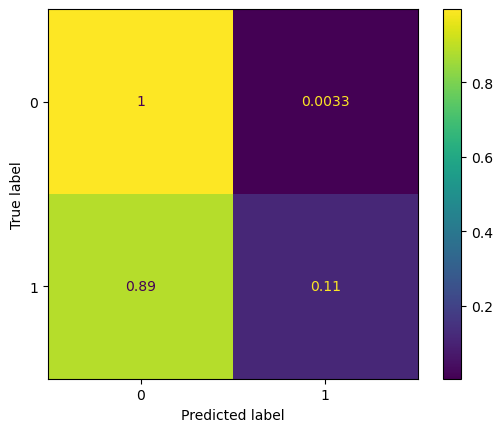

In [174]:
cm = confusion_matrix(target_test, pred, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

## Модель на основе нейронной сети

In [175]:
features = data.drop(columns=['target', 'report_date'])

In [176]:
target = data['target']

In [177]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, stratify=target,
                                                                            random_state=RS)

In [178]:
features_train, target_train = SMOTE().fit_resample(features_train, target_train)

In [179]:
def baseline_nn(features_train):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=features_train.shape[1], input_dim=features_train.shape[1], 
                                 activation='sigmoid'))
    model.add(keras.layers.Dense(units=1, input_dim=features_train.shape[1], 
                                 activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc', AUC()])
    
    return model

In [180]:
model = baseline_nn(features_train)

In [181]:
model.fit(features_train, target_train, epochs=10, verbose=2,
          validation_data=(features_test, target_test))

Epoch 1/10


614/614 - 2s - loss: 0.6855 - acc: 0.5550 - auc: 0.5770 - val_loss: 0.6734 - val_acc: 0.6521 - val_auc: 0.6146 - 2s/epoch - 3ms/step
Epoch 2/10
614/614 - 1s - loss: 0.6812 - acc: 0.5549 - auc: 0.5801 - val_loss: 0.6589 - val_acc: 0.6657 - val_auc: 0.6227 - 807ms/epoch - 1ms/step
Epoch 3/10
614/614 - 1s - loss: 0.6795 - acc: 0.5541 - auc: 0.5828 - val_loss: 0.6993 - val_acc: 0.6514 - val_auc: 0.6254 - 822ms/epoch - 1ms/step
Epoch 4/10
614/614 - 1s - loss: 0.6783 - acc: 0.5553 - auc: 0.5865 - val_loss: 0.6479 - val_acc: 0.6666 - val_auc: 0.6263 - 814ms/epoch - 1ms/step
Epoch 5/10
614/614 - 1s - loss: 0.6771 - acc: 0.5563 - auc: 0.5874 - val_loss: 0.6873 - val_acc: 0.6530 - val_auc: 0.6275 - 759ms/epoch - 1ms/step
Epoch 6/10
614/614 - 1s - loss: 0.6759 - acc: 0.5581 - auc: 0.5912 - val_loss: 0.6372 - val_acc: 0.6705 - val_auc: 0.6286 - 776ms/epoch - 1ms/step
Epoch 7/10
614/614 - 1s - loss: 0.6749 - acc: 0.5570 - auc: 0.5936 - val_loss: 0.6778 - val_acc: 0.6661 - val_auc: 0.62

In [182]:
pred = model.predict(features_test)

136/136 [==============================] - 0s 933us/step


In [183]:
nn_auc_test = roc_auc_score(target_test, pred)
nn_auc_test

0.6328318686863188

In [184]:
pred_bin = pred > 0.5

In [185]:
pred_bin = pred_bin.astype('int')

In [186]:
nn_f1_test = f1_score(target_test, pred_bin)
nn_f1_test

0.08745247148288975